In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('shamiri_imputed_dataset.csv')
df

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,...,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
0,SR_001,3,0,2,1,1,1,3,1,1,...,7,6,7,6,6,Minority,M,Starays,18.0,Poor
1,SR_002,3,0,1,0,0,1,2,2,0,...,7,5,7,3,6,Minority,M,Starays,16.0,Poor
2,SR_003,2,3,0,1,2,3,1,2,0,...,5,2,2,5,5,Minority,F,Starays,14.0,Poor
3,SR_004,1,3,1,1,2,1,3,1,3,...,4,4,5,4,3,Minority,M,Starays,20.0,Poor
4,SR_005,1,1,0,1,0,3,3,0,1,...,6,6,2,6,2,Minority,M,Starays,18.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,...,6,5,4,7,5,Minority,F,Olympic,15.0,Medium
654,OLY_209,3,3,3,3,3,3,3,3,0,...,4,3,3,4,5,Majority,F,Olympic,16.0,Medium
655,OLY_210,2,3,3,3,2,3,3,2,2,...,5,6,7,7,6,Minority,F,Olympic,16.0,Medium
656,OLY_211,0,0,0,0,0,0,0,0,0,...,6,5,2,5,5,Majority,F,Olympic,16.0,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ParticipantID     658 non-null    object 
 1   PHQ1              658 non-null    int64  
 2   PHQ2              658 non-null    int64  
 3   PHQ3              658 non-null    int64  
 4   PHQ4              658 non-null    int64  
 5   PHQ5              658 non-null    int64  
 6   PHQ6              658 non-null    int64  
 7   PHQ7              658 non-null    int64  
 8   PHQ8              658 non-null    int64  
 9   GAD1              658 non-null    int64  
 10  GAD2              658 non-null    int64  
 11  GAD3              658 non-null    int64  
 12  GAD4              658 non-null    int64  
 13  GAD5              658 non-null    int64  
 14  GAD6              658 non-null    int64  
 15  GAD7              658 non-null    int64  
 16  MSSS1             658 non-null    int64  
 1

In [4]:
df.shape

(658, 33)

In [5]:
df.isnull().sum()

ParticipantID       0
PHQ1                0
PHQ2                0
PHQ3                0
PHQ4                0
PHQ5                0
PHQ6                0
PHQ7                0
PHQ8                0
GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
MSSS1               0
MSSS2               0
MSSS3               0
MSSS4               0
MSSS5               0
MSSS6               0
MSSS7               0
MSSS8               0
MSSS9               0
MSSS10              0
MSSS11              0
MSSS12              0
Tribe               0
Gender              0
School              0
Age                 0
School_Resources    0
dtype: int64

In [6]:
df.nunique()

ParticipantID       626
PHQ1                  4
PHQ2                  4
PHQ3                  5
PHQ4                  4
PHQ5                  4
PHQ6                  4
PHQ7                  4
PHQ8                  4
GAD1                  4
GAD2                  4
GAD3                  4
GAD4                  4
GAD5                  4
GAD6                  4
GAD7                  4
MSSS1                 7
MSSS2                 7
MSSS3                 7
MSSS4                 7
MSSS5                 7
MSSS6                 7
MSSS7                 7
MSSS8                 7
MSSS9                 7
MSSS10                8
MSSS11                7
MSSS12                7
Tribe                 2
Gender                2
School                5
Age                  14
School_Resources      3
dtype: int64

In [7]:
#While there are no duplicate rows, there are several rows with the same participant ID. we need to identify and remove these

df2 = df.pivot_table(index = ['ParticipantID'], aggfunc ='size').sort_values(ascending = False)
df2.head(33)

ParticipantID
AHS_121    2
AHS_120    2
AHS_118    2
AHS_117    2
AHS_116    2
AHS_115    2
AHS_114    2
AHS_113    2
AHS_112    2
AHS_111    2
AHS_110    2
AHS_109    2
AHS_108    2
AHS_107    2
AHS_106    2
AHS_105    2
AHS_104    2
AHS_103    2
AHS_102    2
AHS_119    2
AHS_101    2
AHS_131    2
AHS_123    2
AHS_124    2
AHS_125    2
AHS_126    2
AHS_127    2
AHS_128    2
AHS_129    2
AHS_130    2
AHS_122    2
AHS_132    2
OLY_083    1
dtype: int64

In [8]:
df3 = df.drop_duplicates(subset = ['ParticipantID'])
df3

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,...,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
0,SR_001,3,0,2,1,1,1,3,1,1,...,7,6,7,6,6,Minority,M,Starays,18.0,Poor
1,SR_002,3,0,1,0,0,1,2,2,0,...,7,5,7,3,6,Minority,M,Starays,16.0,Poor
2,SR_003,2,3,0,1,2,3,1,2,0,...,5,2,2,5,5,Minority,F,Starays,14.0,Poor
3,SR_004,1,3,1,1,2,1,3,1,3,...,4,4,5,4,3,Minority,M,Starays,20.0,Poor
4,SR_005,1,1,0,1,0,3,3,0,1,...,6,6,2,6,2,Minority,M,Starays,18.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,...,6,5,4,7,5,Minority,F,Olympic,15.0,Medium
654,OLY_209,3,3,3,3,3,3,3,3,0,...,4,3,3,4,5,Majority,F,Olympic,16.0,Medium
655,OLY_210,2,3,3,3,2,3,3,2,2,...,5,6,7,7,6,Minority,F,Olympic,16.0,Medium
656,OLY_211,0,0,0,0,0,0,0,0,0,...,6,5,2,5,5,Majority,F,Olympic,16.0,Medium


In [9]:
df3.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,...,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Age
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,1.343450,1.238019,1.158147,1.161342,0.937700,1.289137,1.416933,0.760383,1.060703,1.330671,...,5.289137,5.277955,4.562300,4.247604,4.891374,4.856230,5.129393,5.442492,4.241214,15.876198
std,1.083076,1.108177,1.164367,1.014065,1.120407,1.170754,1.121556,1.010392,1.016420,1.151383,...,1.818424,1.865748,1.734391,1.911071,1.985795,1.818598,1.988173,1.740083,1.878969,1.420228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.250000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,5.000000,3.000000,15.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,16.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.750000,3.000000,1.000000,2.000000,2.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,17.000000
max,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,25.000000


In [10]:
df3.nunique()

ParticipantID       626
PHQ1                  4
PHQ2                  4
PHQ3                  5
PHQ4                  4
PHQ5                  4
PHQ6                  4
PHQ7                  4
PHQ8                  4
GAD1                  4
GAD2                  4
GAD3                  4
GAD4                  4
GAD5                  4
GAD6                  4
GAD7                  4
MSSS1                 7
MSSS2                 7
MSSS3                 7
MSSS4                 7
MSSS5                 7
MSSS6                 7
MSSS7                 7
MSSS8                 7
MSSS9                 7
MSSS10                8
MSSS11                7
MSSS12                7
Tribe                 2
Gender                2
School                5
Age                  14
School_Resources      3
dtype: int64

In [11]:
pd.set_option('display.max_columns', None)
df3.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Age
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,1.343450,1.238019,1.158147,1.161342,0.937700,1.289137,1.416933,0.760383,1.060703,1.330671,1.539936,1.012780,0.785942,1.222045,1.289137,5.130990,5.183706,5.827476,5.289137,5.277955,4.562300,4.247604,4.891374,4.856230,5.129393,5.442492,4.241214,15.876198
std,1.083076,1.108177,1.164367,1.014065,1.120407,1.170754,1.121556,1.010392,1.016420,1.151383,1.131018,1.114198,1.009805,1.112932,1.151462,1.851814,1.875259,1.598683,1.818424,1.865748,1.734391,1.911071,1.985795,1.818598,1.988173,1.740083,1.878969,1.420228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,6.000000,4.250000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,5.000000,3.000000,15.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,16.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.750000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,17.000000
max,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,25.000000


# Finding outliers and removing them

In [12]:
df3['MSSS10'].unique()

array([7, 2, 5, 6, 1, 3, 4, 8], dtype=int64)

In [13]:
df3['PHQ3'].unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [14]:
df3['Tribe'].unique()

array(['Minority', 'Majority'], dtype=object)

In [15]:
df3['Gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
df3['School'].unique()

array(['Starays', 'Elite', 'AHS', 'AGHS', 'Olympic'], dtype=object)

In [17]:
df3['School_Resources'].unique()

array(['Poor', 'Rich', 'Medium'], dtype=object)

In [18]:
df3[df3['PHQ3'] > 3]

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
365,AGHS_077,3,2,4,0,0,3,3,3,2,3,1,3,2,3,3,7,7,7,7,7,6,6,6,7,7,6,5,Minority,F,AGHS,14.0,Rich
593,OLY_148,2,3,4,2,0,1,3,0,1,1,3,1,0,0,1,2,5,1,5,5,3,2,3,2,2,5,1,Minority,F,Olympic,15.0,Medium


In [19]:
df3[df3['MSSS10'] > 7 ]

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
322,AGHS_034,2,1,3,1,0,0,1,0,1,2,1,0,0,0,1,6,6,4,3,6,3,6,4,4,8,4,3,Minority,F,AGHS,17.0,Rich


In [20]:
df4 = df3.drop([322, 365, 593])
df4

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
0,SR_001,3,0,2,1,1,1,3,1,1,2,3,3,1,3,0,1,1,6,5,1,5,6,7,6,7,6,6,Minority,M,Starays,18.0,Poor
1,SR_002,3,0,1,0,0,1,2,2,0,0,0,1,1,0,0,1,4,6,5,5,3,2,7,5,7,3,6,Minority,M,Starays,16.0,Poor
2,SR_003,2,3,0,1,2,3,1,2,0,2,3,1,0,3,1,2,2,7,5,2,5,2,5,2,2,5,5,Minority,F,Starays,14.0,Poor
3,SR_004,1,3,1,1,2,1,3,1,3,3,3,1,1,3,2,4,4,5,4,5,4,3,4,4,5,4,3,Minority,M,Starays,20.0,Poor
4,SR_005,1,1,0,1,0,3,3,0,1,3,3,1,0,1,0,6,6,6,6,6,2,2,6,6,2,6,2,Minority,M,Starays,18.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,1,2,3,1,3,1,7,6,7,7,7,6,4,6,5,4,7,5,Minority,F,Olympic,15.0,Medium
654,OLY_209,3,3,3,3,3,3,3,3,0,2,3,3,3,2,2,4,2,6,4,4,4,4,4,3,3,4,5,Majority,F,Olympic,16.0,Medium
655,OLY_210,2,3,3,3,2,3,3,2,2,3,2,1,3,3,3,7,7,7,6,7,6,6,5,6,7,7,6,Minority,F,Olympic,16.0,Medium
656,OLY_211,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,5,5,6,2,5,5,5,6,5,2,5,5,Majority,F,Olympic,16.0,Medium


In [21]:
df4.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Age
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,1.338684,1.234350,1.146067,1.162119,0.942215,1.288925,1.412520,0.759230,1.059390,1.327448,1.539326,1.011236,0.786517,1.223114,1.287319,5.131621,5.179775,5.836276,5.290530,5.274478,4.565008,4.245586,4.894061,4.858748,5.126806,5.444623,4.247191,15.878812
std,1.083001,1.108129,1.153568,1.014862,1.121207,1.170369,1.120535,1.007914,1.018165,1.151820,1.131816,1.113294,1.010083,1.111173,1.152078,1.850179,1.878061,1.588392,1.819161,1.868707,1.735351,1.910971,1.988313,1.817019,1.984256,1.743080,1.878090,1.420509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,6.000000,4.500000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,5.000000,3.000000,15.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,16.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,17.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,25.000000


In [22]:
df4.nunique()

ParticipantID       623
PHQ1                  4
PHQ2                  4
PHQ3                  4
PHQ4                  4
PHQ5                  4
PHQ6                  4
PHQ7                  4
PHQ8                  4
GAD1                  4
GAD2                  4
GAD3                  4
GAD4                  4
GAD5                  4
GAD6                  4
GAD7                  4
MSSS1                 7
MSSS2                 7
MSSS3                 7
MSSS4                 7
MSSS5                 7
MSSS6                 7
MSSS7                 7
MSSS8                 7
MSSS9                 7
MSSS10                7
MSSS11                7
MSSS12                7
Tribe                 2
Gender                2
School                5
Age                  14
School_Resources      3
dtype: int64

In [23]:
df4['PHScore'] = df4[['PHQ1', 'PHQ2', 'PHQ3','PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].sum(axis=1)
df4

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources,PHScore
0,SR_001,3,0,2,1,1,1,3,1,1,2,3,3,1,3,0,1,1,6,5,1,5,6,7,6,7,6,6,Minority,M,Starays,18.0,Poor,12
1,SR_002,3,0,1,0,0,1,2,2,0,0,0,1,1,0,0,1,4,6,5,5,3,2,7,5,7,3,6,Minority,M,Starays,16.0,Poor,9
2,SR_003,2,3,0,1,2,3,1,2,0,2,3,1,0,3,1,2,2,7,5,2,5,2,5,2,2,5,5,Minority,F,Starays,14.0,Poor,14
3,SR_004,1,3,1,1,2,1,3,1,3,3,3,1,1,3,2,4,4,5,4,5,4,3,4,4,5,4,3,Minority,M,Starays,20.0,Poor,13
4,SR_005,1,1,0,1,0,3,3,0,1,3,3,1,0,1,0,6,6,6,6,6,2,2,6,6,2,6,2,Minority,M,Starays,18.0,Poor,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,1,2,3,1,3,1,7,6,7,7,7,6,4,6,5,4,7,5,Minority,F,Olympic,15.0,Medium,12
654,OLY_209,3,3,3,3,3,3,3,3,0,2,3,3,3,2,2,4,2,6,4,4,4,4,4,3,3,4,5,Majority,F,Olympic,16.0,Medium,24
655,OLY_210,2,3,3,3,2,3,3,2,2,3,2,1,3,3,3,7,7,7,6,7,6,6,5,6,7,7,6,Minority,F,Olympic,16.0,Medium,21
656,OLY_211,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,5,5,6,2,5,5,5,6,5,2,5,5,Majority,F,Olympic,16.0,Medium,0


In [24]:
df4['GADScore'] = df4[['GAD1', 'GAD2', 'GAD3','GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)
df4['MSTScale'] = df4[['MSSS1', 'MSSS2', 'MSSS3','MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12']].mean(axis=1)
df4

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources,PHScore,GADScore,MSTScale
0,SR_001,3,0,2,1,1,1,3,1,1,2,3,3,1,3,0,1,1,6,5,1,5,6,7,6,7,6,6,Minority,M,Starays,18.0,Poor,12,13,4.750000
1,SR_002,3,0,1,0,0,1,2,2,0,0,0,1,1,0,0,1,4,6,5,5,3,2,7,5,7,3,6,Minority,M,Starays,16.0,Poor,9,2,4.500000
2,SR_003,2,3,0,1,2,3,1,2,0,2,3,1,0,3,1,2,2,7,5,2,5,2,5,2,2,5,5,Minority,F,Starays,14.0,Poor,14,10,3.666667
3,SR_004,1,3,1,1,2,1,3,1,3,3,3,1,1,3,2,4,4,5,4,5,4,3,4,4,5,4,3,Minority,M,Starays,20.0,Poor,13,16,4.083333
4,SR_005,1,1,0,1,0,3,3,0,1,3,3,1,0,1,0,6,6,6,6,6,2,2,6,6,2,6,2,Minority,M,Starays,18.0,Poor,9,9,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,1,2,3,1,3,1,7,6,7,7,7,6,4,6,5,4,7,5,Minority,F,Olympic,15.0,Medium,12,12,5.916667
654,OLY_209,3,3,3,3,3,3,3,3,0,2,3,3,3,2,2,4,2,6,4,4,4,4,4,3,3,4,5,Majority,F,Olympic,16.0,Medium,24,15,3.916667
655,OLY_210,2,3,3,3,2,3,3,2,2,3,2,1,3,3,3,7,7,7,6,7,6,6,5,6,7,7,6,Minority,F,Olympic,16.0,Medium,21,17,6.416667
656,OLY_211,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,5,5,6,2,5,5,5,6,5,2,5,5,Majority,F,Olympic,16.0,Medium,0,3,4.666667


In [25]:
df4['MSSigScale'] = df4[['MSSS1', 'MSSS2', 'MSSS5', 'MSSS10']].mean(axis=1)
df4['MSFamScale'] = df4[['MSSS3', 'MSSS4', 'MSSS8', 'MSSS11']].mean(axis=1)
df4['MSFriScale'] = df4[['MSSS6', 'MSSS7', 'MSSS9', 'MSSS12']].mean(axis=1)
df4

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,MSSS1,MSSS2,MSSS3,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
0,SR_001,3,0,2,1,1,1,3,1,1,2,3,3,1,3,0,1,1,6,5,1,5,6,7,6,7,6,6,Minority,M,Starays,18.0,Poor,12,13,4.750000,2.50,6.00,5.75
1,SR_002,3,0,1,0,0,1,2,2,0,0,0,1,1,0,0,1,4,6,5,5,3,2,7,5,7,3,6,Minority,M,Starays,16.0,Poor,9,2,4.500000,4.25,5.25,4.00
2,SR_003,2,3,0,1,2,3,1,2,0,2,3,1,0,3,1,2,2,7,5,2,5,2,5,2,2,5,5,Minority,F,Starays,14.0,Poor,14,10,3.666667,2.00,5.50,3.50
3,SR_004,1,3,1,1,2,1,3,1,3,3,3,1,1,3,2,4,4,5,4,5,4,3,4,4,5,4,3,Minority,M,Starays,20.0,Poor,13,16,4.083333,4.50,4.25,3.50
4,SR_005,1,1,0,1,0,3,3,0,1,3,3,1,0,1,0,6,6,6,6,6,2,2,6,6,2,6,2,Minority,M,Starays,18.0,Poor,9,9,4.666667,5.00,6.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,1,2,3,1,3,1,7,6,7,7,7,6,4,6,5,4,7,5,Minority,F,Olympic,15.0,Medium,12,12,5.916667,6.00,6.75,5.00
654,OLY_209,3,3,3,3,3,3,3,3,0,2,3,3,3,2,2,4,2,6,4,4,4,4,4,3,3,4,5,Majority,F,Olympic,16.0,Medium,24,15,3.916667,3.25,4.50,4.00
655,OLY_210,2,3,3,3,2,3,3,2,2,3,2,1,3,3,3,7,7,7,6,7,6,6,5,6,7,7,6,Minority,F,Olympic,16.0,Medium,21,17,6.416667,7.00,6.25,6.00
656,OLY_211,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,5,5,6,2,5,5,5,6,5,2,5,5,Majority,F,Olympic,16.0,Medium,0,3,4.666667,4.25,4.75,5.00


In [26]:
df5 = df4.drop(['PHQ1', 'PHQ2','PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12'], axis=1)
df5

,ParticipantID,Tribe,Gender,School,Age,School_Resources,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
0,SR_001,Minority,M,Starays,18.0,Poor,12,13,4.750000,2.50,6.00,5.75
1,SR_002,Minority,M,Starays,16.0,Poor,9,2,4.500000,4.25,5.25,4.00
2,SR_003,Minority,F,Starays,14.0,Poor,14,10,3.666667,2.00,5.50,3.50
3,SR_004,Minority,M,Starays,20.0,Poor,13,16,4.083333,4.50,4.25,3.50
4,SR_005,Minority,M,Starays,18.0,Poor,9,9,4.666667,5.00,6.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,Minority,F,Olympic,15.0,Medium,12,12,5.916667,6.00,6.75,5.00
654,OLY_209,Majority,F,Olympic,16.0,Medium,24,15,3.916667,3.25,4.50,4.00
655,OLY_210,Minority,F,Olympic,16.0,Medium,21,17,6.416667,7.00,6.25,6.00
656,OLY_211,Majority,F,Olympic,16.0,Medium,0,3,4.666667,4.25,4.75,5.00


In [27]:
bins = [0, 4, 9, 14, 19, 24]
labels = ['Minimal', 'Mild', 'Moderate', 'ModeratelySevere', 'Severe']

df5['DepressionLevel'] = pd.cut(df5['PHScore'], bins=bins, labels=labels)

df5

,ParticipantID,Tribe,Gender,School,Age,School_Resources,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale,DepressionLevel
0,SR_001,Minority,M,Starays,18.0,Poor,12,13,4.750000,2.50,6.00,5.75,Moderate
1,SR_002,Minority,M,Starays,16.0,Poor,9,2,4.500000,4.25,5.25,4.00,Mild
2,SR_003,Minority,F,Starays,14.0,Poor,14,10,3.666667,2.00,5.50,3.50,Moderate
3,SR_004,Minority,M,Starays,20.0,Poor,13,16,4.083333,4.50,4.25,3.50,Moderate
4,SR_005,Minority,M,Starays,18.0,Poor,9,9,4.666667,5.00,6.00,3.00,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,Minority,F,Olympic,15.0,Medium,12,12,5.916667,6.00,6.75,5.00,Moderate
654,OLY_209,Majority,F,Olympic,16.0,Medium,24,15,3.916667,3.25,4.50,4.00,Severe
655,OLY_210,Minority,F,Olympic,16.0,Medium,21,17,6.416667,7.00,6.25,6.00,Severe
656,OLY_211,Majority,F,Olympic,16.0,Medium,0,3,4.666667,4.25,4.75,5.00,NaN


In [28]:
bins = [0, 4, 9, 14, 21]
labels = ['Minimal', 'Mild', 'Moderate', 'Severe']

df5['AnxietyLevel'] = pd.cut(df5['GADScore'], bins=bins, labels=labels)

df5

,ParticipantID,Tribe,Gender,School,Age,School_Resources,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale,DepressionLevel,AnxietyLevel
0,SR_001,Minority,M,Starays,18.0,Poor,12,13,4.750000,2.50,6.00,5.75,Moderate,Moderate
1,SR_002,Minority,M,Starays,16.0,Poor,9,2,4.500000,4.25,5.25,4.00,Mild,Minimal
2,SR_003,Minority,F,Starays,14.0,Poor,14,10,3.666667,2.00,5.50,3.50,Moderate,Moderate
3,SR_004,Minority,M,Starays,20.0,Poor,13,16,4.083333,4.50,4.25,3.50,Moderate,Severe
4,SR_005,Minority,M,Starays,18.0,Poor,9,9,4.666667,5.00,6.00,3.00,Mild,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,Minority,F,Olympic,15.0,Medium,12,12,5.916667,6.00,6.75,5.00,Moderate,Moderate
654,OLY_209,Majority,F,Olympic,16.0,Medium,24,15,3.916667,3.25,4.50,4.00,Severe,Severe
655,OLY_210,Minority,F,Olympic,16.0,Medium,21,17,6.416667,7.00,6.25,6.00,Severe,Severe
656,OLY_211,Majority,F,Olympic,16.0,Medium,0,3,4.666667,4.25,4.75,5.00,NaN,Minimal


In [29]:
countmin = df5['Tribe'].value_counts()['Minority']
countmaj = df5['Tribe'].value_counts()['Majority']

print(countmin, countmaj)

415 208


([<matplotlib.patches.Wedge at 0x248ee5ac2e0>,
 [Text(-0.548397939647385, 0.9535510997269645, 'Minority'),
  Text(0.5483979396473845, -0.9535510997269647, 'Majority')])

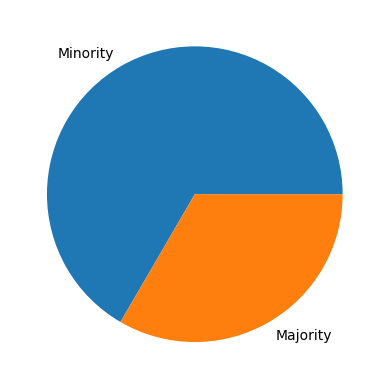

In [30]:
import numpy as np
y = np.array([countmin, countmaj])
y
my_labels = ['Minority', 'Majority']
plt.pie(y, labels = my_labels)


In [31]:
countM = df5['Gender'].value_counts()['M']
countF = df5['Gender'].value_counts()['F']

print(countM, countF)

288 335


([<matplotlib.patches.Wedge at 0x248eecf2fb0>,
 [Text(0.13004853838353658, 1.0922853920401507, 'Male'),
  Text(-0.13004864065067515, -1.0922853798641232, 'Female')])

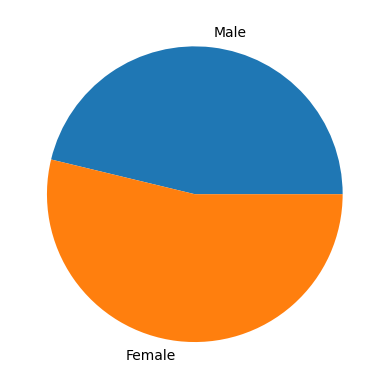

In [32]:
a = np.array([countM, countF])

gen_labels = ['Male', 'Female']
plt.pie(a, labels = gen_labels)


In [33]:
countP = df5['School_Resources'].value_counts()['Poor']
countMed = df5['School_Resources'].value_counts()['Medium']
countRich = df5['School_Resources'].value_counts()['Rich']
b = [countP, countMed, countRich]
b

[167, 211, 245]

In [34]:
c = ['ResourceLevel', 'Count']
d = pd.DataFrame(columns = c)
d


,ResourceLevel,Count


In [35]:
d['ResourceLevel'] = ['Poor', 'Medium', 'Rich']
d['Count'] = b
d

,ResourceLevel,Count
0,Poor,167
1,Medium,211
2,Rich,245


<Axes: xlabel='ResourceLevel'>

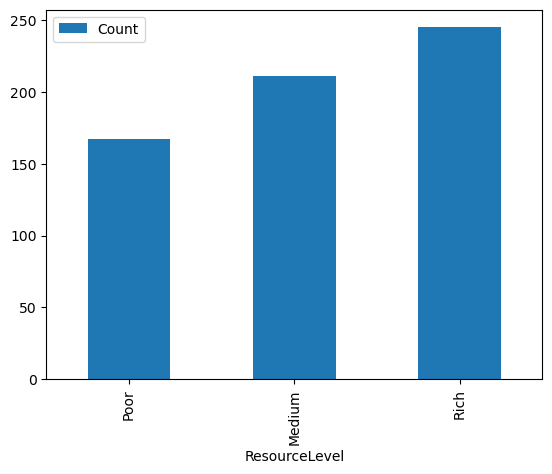

In [37]:
d.plot(kind='bar', x = 'ResourceLevel')

In [38]:
DMinimal = df5['DepressionLevel'].value_counts()['Minimal']
DMild = df5['DepressionLevel'].value_counts()['Mild']
DModerate = df5['DepressionLevel'].value_counts()['Moderate']
DModerateServ = df5['DepressionLevel'].value_counts()['ModeratelySevere']
DServe = df5['DepressionLevel'].value_counts()['Severe']

e = [DMinimal, DMild, DModerate, DModerateServ, DServe ]
e

[106, 222, 176, 84, 23]

In [39]:
f = ['DepressionLevel', 'Count']
g = pd.DataFrame(columns = f)
g


,DepressionLevel,Count


In [40]:
g['DepressionLevel'] = ['Minimal', 'Mild', 'Moderate', 'ModeratelySevere', 'Severe']
g['Count'] = e
g

,DepressionLevel,Count
0,Minimal,106
1,Mild,222
2,Moderate,176
3,ModeratelySevere,84
4,Severe,23


<Axes: xlabel='DepressionLevel'>

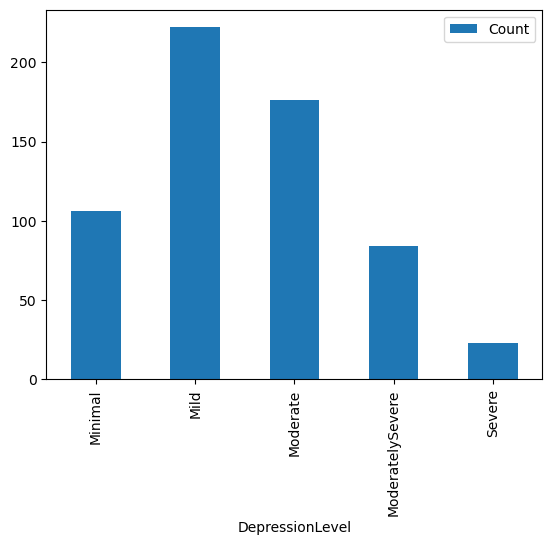

In [41]:
g.plot(kind='bar', x = 'DepressionLevel' )

In [42]:
df5['School'].unique()

array(['Starays', 'Elite', 'AHS', 'AGHS', 'Olympic'], dtype=object)

In [46]:
AMinimal = df5['AnxietyLevel'].value_counts()['Minimal']
AMild = df5['AnxietyLevel'].value_counts()['Mild']
AModerate = df5['AnxietyLevel'].value_counts()['Moderate']
AServe = df5['AnxietyLevel'].value_counts()['Severe']

h = [AMinimal, AMild, AModerate, AServe ]
h

[139, 223, 156, 81]

In [47]:
i = ['AnxietyLevel', 'Count']
j = pd.DataFrame(columns = i)
j


,AnxietyLevel,Count


In [48]:
j['AnxietyLevel'] = ['Minimal', 'Mild', 'Moderate', 'Severe']
j['Count'] = h
j

,AnxietyLevel,Count
0,Minimal,139
1,Mild,223
2,Moderate,156
3,Severe,81


<Axes: xlabel='AnxietyLevel'>

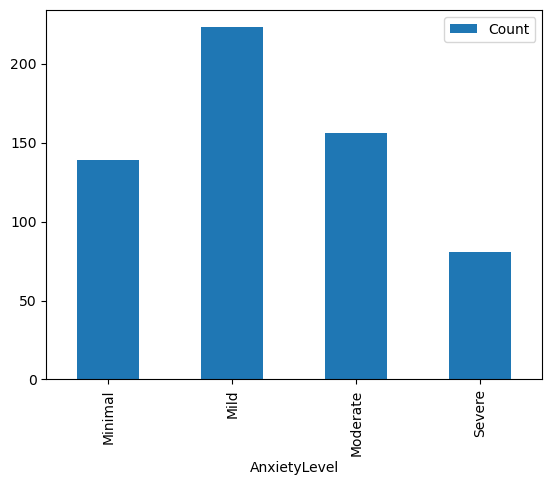

In [49]:
j.plot(kind='bar', x = 'AnxietyLevel')

In [50]:
Sta = df5['School'].value_counts()['Starays']
Olym = df5['School'].value_counts()['Olympic']
AGHS = df5['School'].value_counts()['AGHS']
AHS = df5['School'].value_counts()['AHS']
Eli = df5['School'].value_counts()['Elite']

k = [Sta, Olym, AGHS, AHS, Eli]
k

[80, 211, 155, 90, 87]

In [51]:
l = ['School', 'Count']
m = pd.DataFrame(columns = l)
m

,School,Count


In [52]:
m['School'] = ['Starays', 'Olympic', 'AGHS', 'AHS', 'Elite']
m['Count'] = k
n = m.sort_values(by='Count', ascending = False)
n

,School,Count
1,Olympic,211
2,AGHS,155
3,AHS,90
4,Elite,87
0,Starays,80


<Axes: xlabel='School'>

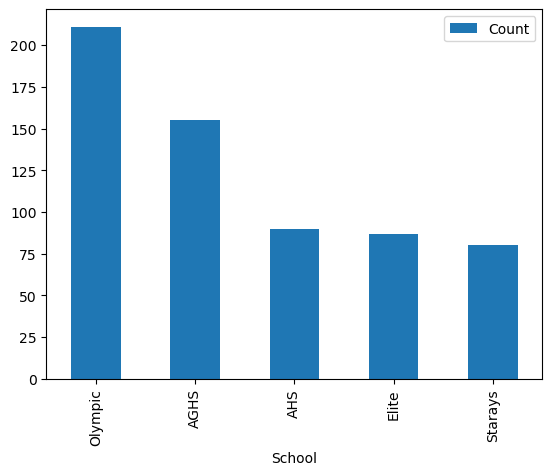

In [53]:
n.plot(kind='bar', x = 'School')

In [54]:
group_by_age = df5.groupby('Age')
age = group_by_age.mean(numeric_only=True)
age

,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
Age,,,,,,
12.0,6.000000,2.000000,4.166667,6.250000,3.250000,3.000000
13.0,7.166667,4.916667,5.861111,6.479167,5.750000,5.354167
14.0,7.493333,7.106667,5.315556,5.500000,5.910000,4.536667
15.0,9.142857,7.952381,5.014385,5.197917,5.520833,4.324405
16.0,9.598958,8.333333,5.069010,5.227865,5.372396,4.606771
17.0,9.954545,8.636364,4.803030,4.947727,5.034091,4.427273
18.0,9.714286,9.571429,4.761905,4.833333,4.976190,4.476190
19.0,10.000000,10.666667,4.572222,4.500000,4.683333,4.533333
20.0,8.666667,11.333333,4.250000,4.583333,5.000000,3.166667


In [55]:
group_by_gender = df5.groupby('Gender')
group_by_gender

In [56]:
gen = group_by_gender.mean(numeric_only=True)
gen

,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
Gender,,,,,,,
F,15.670149,9.528358,8.632836,5.037065,5.218657,5.337313,4.555224
M,16.121528,9.000000,7.770833,4.973958,5.131076,5.400174,4.390625


In [57]:
group_by_resources = df5.groupby('School_Resources')
res = group_by_resources.mean(numeric_only = True)
res

,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
School_Resources,,,,,,,
Medium,15.708531,9.028436,7.895735,5.086888,5.196682,5.469194,4.594787
Poor,16.754491,9.538922,9.053892,4.637725,4.823353,5.037425,4.052395
Rich,15.428571,9.330612,7.967347,5.192177,5.404082,5.502041,4.670408


In [58]:
group_by_tribe = df5.groupby('Tribe')
tribe = group_by_tribe.mean(numeric_only = True)
tribe

,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
Tribe,,,,,,,
Majority,15.586538,9.057692,7.514423,5.065304,5.265625,5.426683,4.503606
Minority,16.025301,9.397590,8.595181,4.979116,5.134337,5.336145,4.466867


In [59]:
group_by_depression = df5.groupby('DepressionLevel')
dep = group_by_depression.mean(numeric_only = True)
dep

,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
DepressionLevel,,,,,,,
Minimal,15.518868,2.839623,3.613208,5.367925,5.636792,5.891509,4.575472
Mild,15.799550,6.905405,6.540541,5.139640,5.281532,5.500000,4.637387
Moderate,16.119318,11.721591,10.238636,4.790720,4.950284,5.112216,4.309659
ModeratelySevere,15.928571,16.500000,13.357143,4.746032,4.895833,4.937500,4.404762
Severe,16.478261,21.782609,15.434783,4.344203,4.608696,4.663043,3.760870


In [60]:
group_by_anxiety = df5.groupby('AnxietyLevel')
anx = group_by_anxiety.mean(numeric_only = True)
anx

,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
AnxietyLevel,,,,,,,
Minimal,15.622302,5.424460,2.582734,5.336331,5.544964,5.717626,4.746403
Mild,15.946188,8.345291,7.017937,4.964873,5.149103,5.302691,4.442825
Moderate,15.891026,11.724359,11.647436,4.817842,4.950321,5.189103,4.314103
Severe,16.320988,15.740741,17.148148,4.690329,4.824074,5.027778,4.219136


<Axes: xlabel='AnxietyLevel', ylabel='MSTScale'>

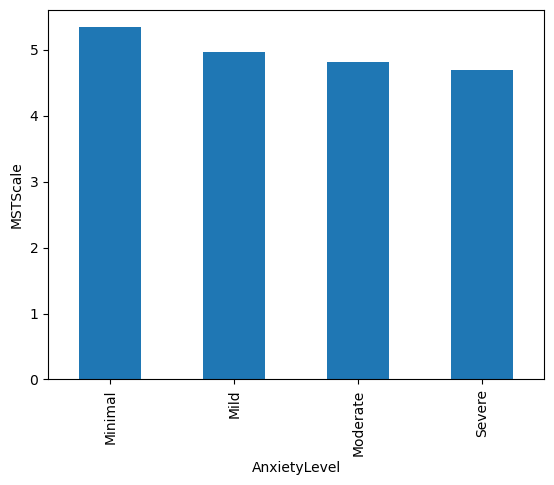

In [71]:
anx['MSTScale'].plot(kind = 'bar', x = 'AnxietyLevel', ylabel = 'MSTScale' )

<Axes: xlabel='DepressionLevel', ylabel='MSTScale'>

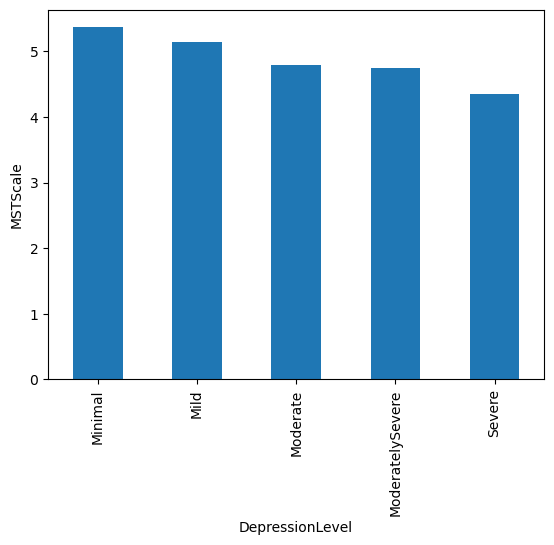

In [72]:
dep['MSTScale'].plot(kind = 'bar', x = 'DepressionLevel', ylabel = 'MSTScale' )

<Axes: xlabel='Age'>

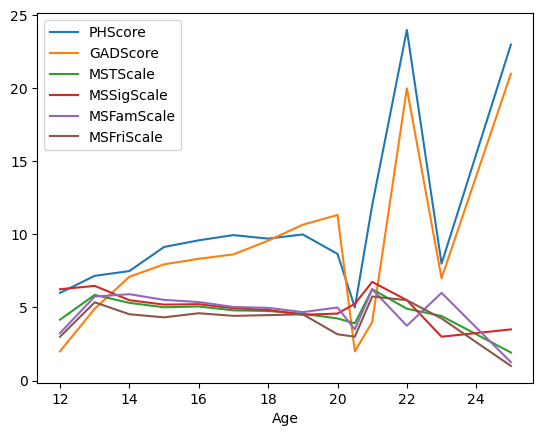

In [61]:
age.plot()

<Axes: xlabel='DepressionLevel', ylabel='GADScore'>

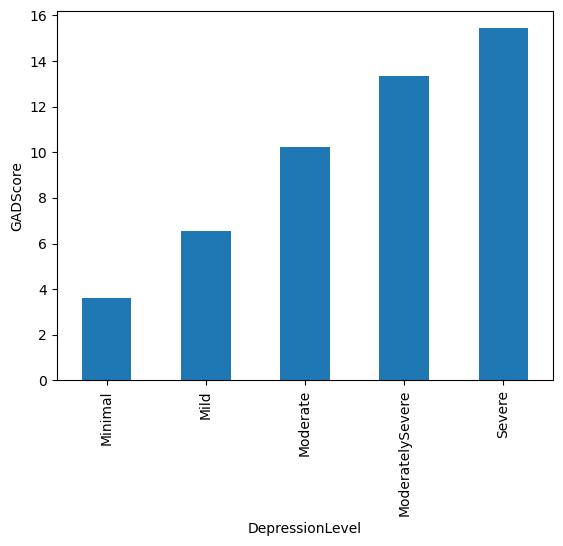

In [62]:
dep['GADScore'].plot.bar(ylabel = 'GADScore')

<Axes: xlabel='AnxietyLevel', ylabel='PHScore'>

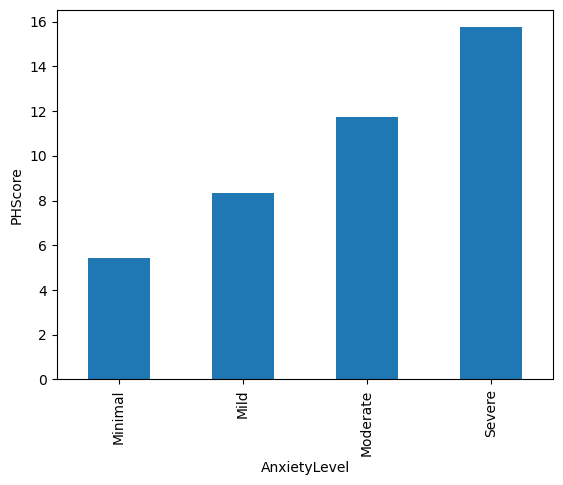

In [63]:
anx['PHScore'].plot.bar(ylabel = 'PHScore')

<Axes: xlabel='Tribe', ylabel='GADScore'>

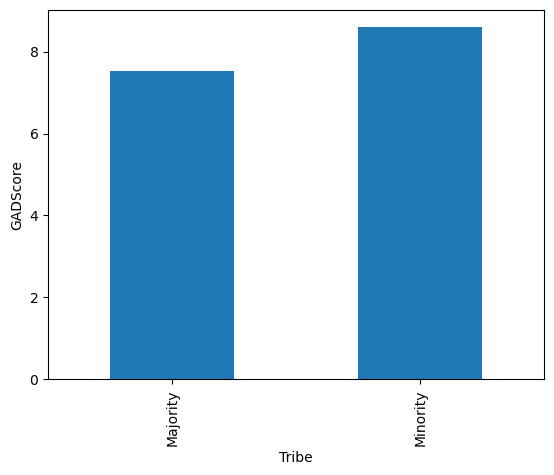

In [64]:
tribe['GADScore'].plot.bar(ylabel = 'GADScore')

<Axes: xlabel='Tribe', ylabel='PHScore'>

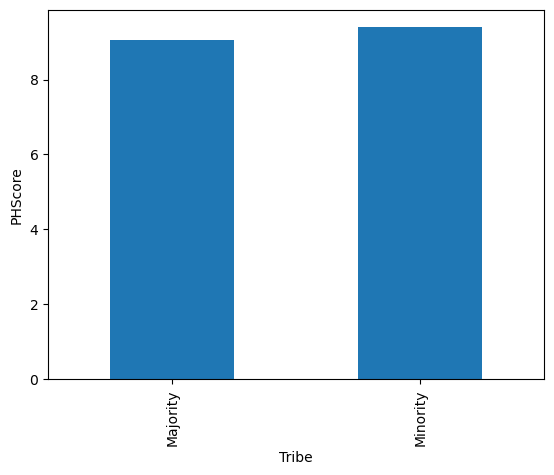

In [65]:
tribe['PHScore'].plot.bar(ylabel = 'PHScore')

<Axes: xlabel='School_Resources', ylabel='GADScore'>

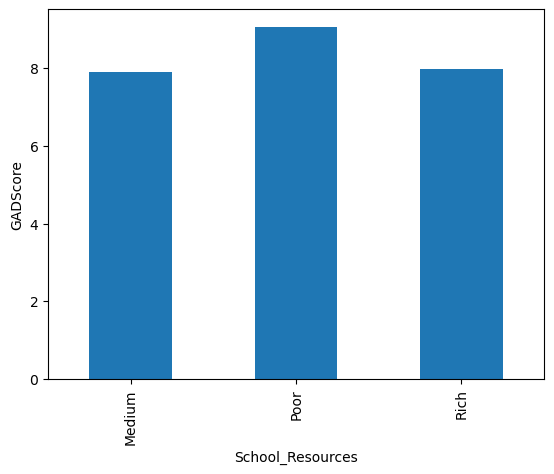

In [66]:
res['GADScore'].plot.bar(ylabel = 'GADScore')

<Axes: xlabel='School_Resources', ylabel='PHScore'>

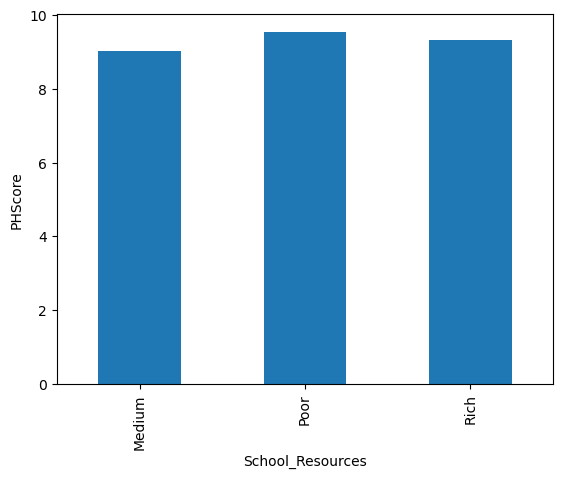

In [67]:
res['PHScore'].plot.bar(ylabel = 'PHScore')

<Axes: xlabel='Gender', ylabel='PHScore'>

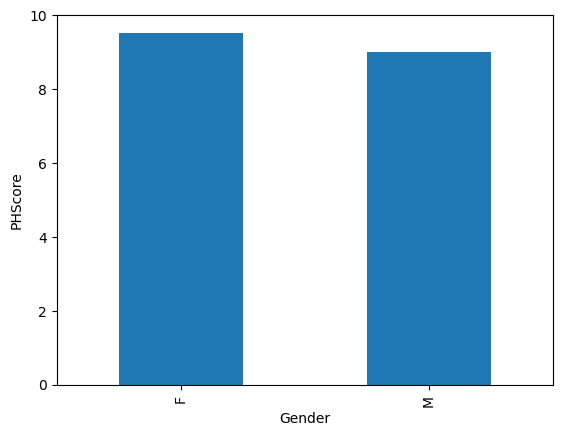

In [68]:
gen['PHScore'].plot.bar(ylabel = 'PHScore')

<Axes: xlabel='Gender', ylabel='GADScore'>

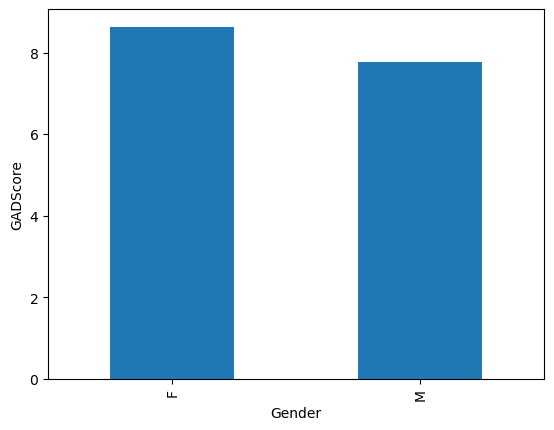

In [70]:
gen['GADScore'].plot.bar(ylabel = 'GADScore')

Text(0, 0.5, 'PHScore')

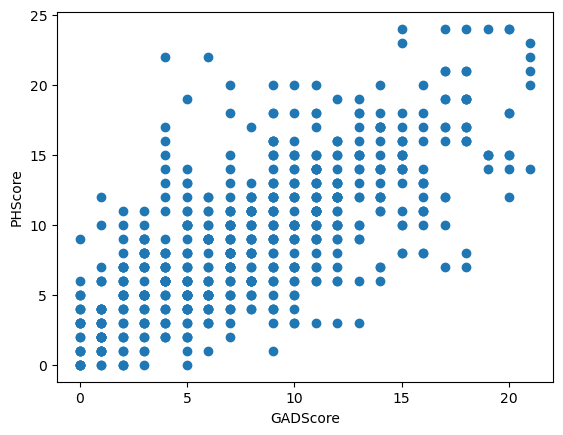

In [43]:
plt.scatter(df5['GADScore'], df5['PHScore'])
plt.xlabel('GADScore')
plt.ylabel('PHScore')


Text(0, 0.5, 'PHScore')

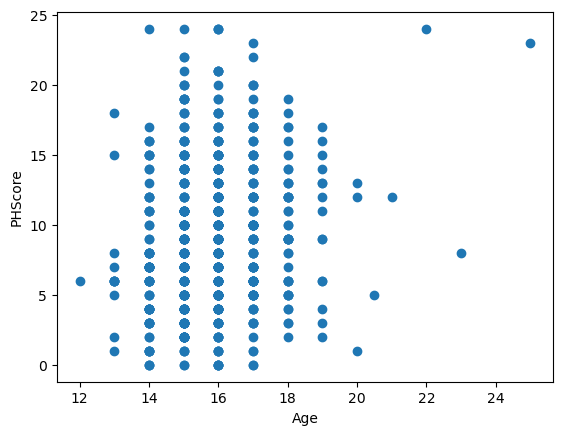

In [41]:
plt.scatter(df5['Age'], df5['PHScore'])
plt.xlabel('Age')
plt.ylabel('PHScore')


Text(0, 0.5, 'GADScore')

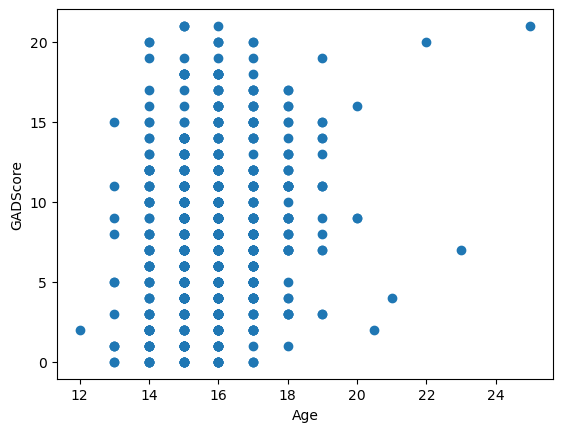

In [42]:
plt.scatter(df5['Age'], df5['GADScore'])
plt.xlabel('Age')
plt.ylabel('GADScore')

Text(0, 0.5, 'PHScore')

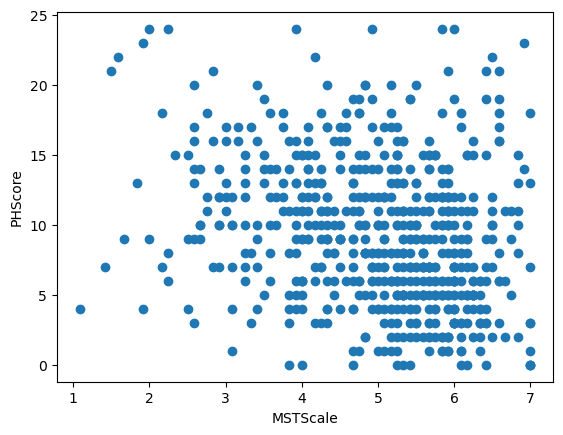

In [47]:
plt.scatter(df5['MSTScale'], df5['PHScore'])
plt.xlabel('MSTScale')
plt.ylabel('PHScore')

Text(0, 0.5, 'GADScore')

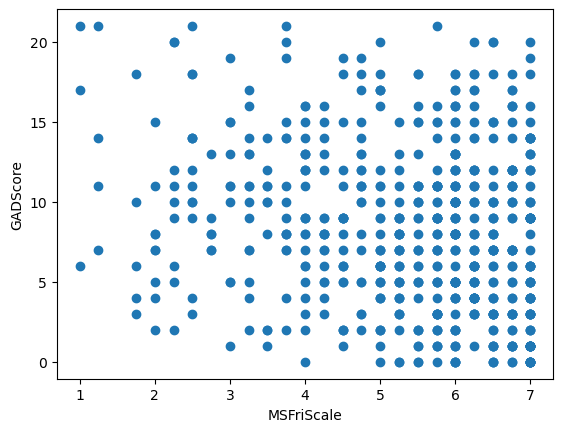

In [54]:
plt.scatter(df5['MSFamScale'], df5['GADScore'])
plt.xlabel('MSFriScale')
plt.ylabel('GADScore')

Text(0, 0.5, 'GADScore')

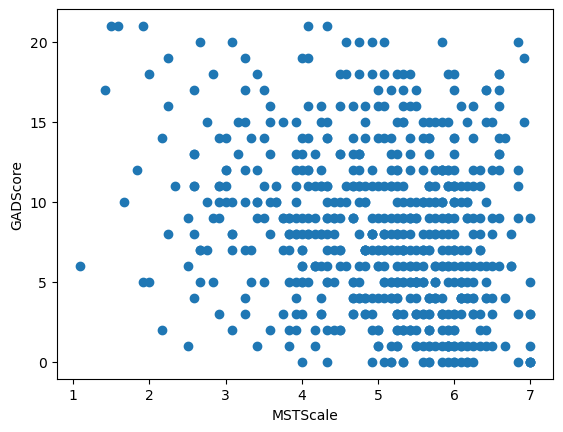

In [49]:
df6 = df5.drop(['Tribe', 'Gender', 'School', 'School_Resources', 'DepressionLevel', 'AnxietyLevel'], axis=1)
df6

In [55]:
df6 = df5.drop(['Tribe', 'Gender', 'School', 'School_Resources', 'DepressionLevel', 'AnxietyLevel'], axis=1)
df6

,ParticipantID,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
0,SR_001,18.0,12,13,4.750000,2.50,6.00,5.75
1,SR_002,16.0,9,2,4.500000,4.25,5.25,4.00
2,SR_003,14.0,14,10,3.666667,2.00,5.50,3.50
3,SR_004,20.0,13,16,4.083333,4.50,4.25,3.50
4,SR_005,18.0,9,9,4.666667,5.00,6.00,3.00
...,...,...,...,...,...,...,...,...
653,OLY_208,15.0,12,12,5.916667,6.00,6.75,5.00
654,OLY_209,16.0,24,15,3.916667,3.25,4.50,4.00
655,OLY_210,16.0,21,17,6.416667,7.00,6.25,6.00
656,OLY_211,16.0,0,3,4.666667,4.25,4.75,5.00


In [56]:
df6.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_1832\2505764688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.corr()


,Age,PHScore,GADScore,MSTScale,MSSigScale,MSFamScale,MSFriScale
Age,1.000000,0.155303,0.177425,-0.174602,-0.163479,-0.210447,-0.042247
PHScore,0.155303,1.000000,0.715423,-0.259543,-0.209951,-0.261066,-0.146629
GADScore,0.177425,0.715423,1.000000,-0.225132,-0.180738,-0.196497,-0.157633
MSTScale,-0.174602,-0.259543,-0.225132,1.000000,0.850505,0.752628,0.768165
MSSigScale,-0.163479,-0.209951,-0.180738,0.850505,1.000000,0.496117,0.511405
MSFamScale,-0.210447,-0.261066,-0.196497,0.752628,0.496117,1.000000,0.304327
MSFriScale,-0.042247,-0.146629,-0.157633,0.768165,0.511405,0.304327,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_1832\1964094976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df6.corr())


<Axes: >

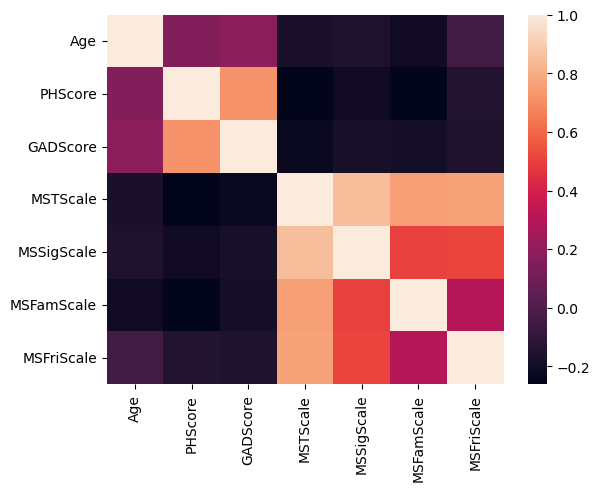

In [57]:
sns.heatmap(df6.corr())

In [173]:
df7 = df5.drop(['Tribe', 'Gender', 'School', 'School_Resources', 'DepressionLevel', 'AnxietyLevel', 'MSSigScale', 'MSFamScale', 'MSFriScale'], axis=1)
df7

,ParticipantID,Age,PHScore,GADScore,MSTScale
0,SR_001,18.0,12,13,4.750000
1,SR_002,16.0,9,2,4.500000
2,SR_003,14.0,14,10,3.666667
3,SR_004,20.0,13,16,4.083333
4,SR_005,18.0,9,9,4.666667
...,...,...,...,...,...
653,OLY_208,15.0,12,12,5.916667
654,OLY_209,16.0,24,15,3.916667
655,OLY_210,16.0,21,17,6.416667
656,OLY_211,16.0,0,3,4.666667


In [174]:
df7.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_1832\2906877236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.corr()


,Age,PHScore,GADScore,MSTScale
Age,1.000000,0.155303,0.177425,-0.174602
PHScore,0.155303,1.000000,0.715423,-0.259543
GADScore,0.177425,0.715423,1.000000,-0.225132
MSTScale,-0.174602,-0.259543,-0.225132,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_1832\3427753725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df7.corr())


<Axes: >

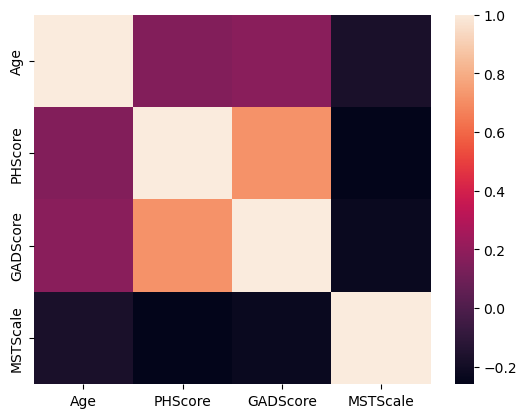

In [175]:
sns.heatmap(df7.corr())